AI基礎プログラミング 効果測定1 問題4

以下のプログラムを実装してください

読み込むCSVファイル  「Boston_kouka1.csv」

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 3.8 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=78f9555f5229486a8a7308554b16a7bfba57445fe4418e38fdbbb6d8bcc1cbf1
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
# matplolibを表示できるようにする
%matplotlib inline

# ライブラリのインポート
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

# CSVファイルを読み込む
df = pd.read_csv('Boston_kouka1.csv')

# 変数dfの先頭5行の中身を表示する
print(df.head())

# 各列の欠損値の件数を表示する
print(df.isnull().sum())

   犯罪率low  犯罪率high    広さ     産業  川辺  ...   税金  生徒と先生      黒人    低所得    価格
0       0        1   0.0  18.10   0  ...  666   20.2  354.70   7.12  27.5
1       1        0   0.0   8.14   0  ...  307   21.0  232.60  27.71  13.2
2       0        0  82.5   2.03   0  ...  348   14.7  393.77   7.43  24.1
3       1        0   0.0  21.89   0  ...  437   21.2  396.90  18.46  17.8
4       0        1   0.0  18.10   0  ...  666   20.2  374.68  11.66  29.8

[5 rows x 15 columns]
犯罪率low     0
犯罪率high    0
広さ         0
産業         0
川辺         0
窒素酸化物      1
部屋数        0
古さ         0
主要施設       0
高速道路       1
税金         0
生徒と先生      0
黒人         0
低所得        0
価格         0
dtype: int64


In [3]:
# データフレームのすべての欠損値を平均値で置き換え、df_fillnaに代入する
df_fillna = df.fillna(df.mean())

# df_fillnaの各列の欠損値の件数を表示する
print(df_fillna.isnull().sum())

犯罪率low     0
犯罪率high    0
広さ         0
産業         0
川辺         0
窒素酸化物      0
部屋数        0
古さ         0
主要施設       0
高速道路       0
税金         0
生徒と先生      0
黒人         0
低所得        0
価格         0
dtype: int64


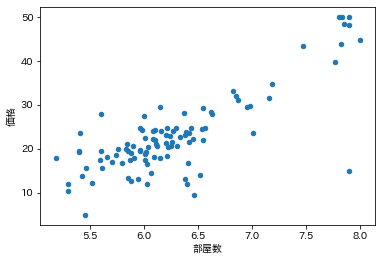

In [4]:
#★① 欠損値を置き換えた後のデータフレームで、横軸を「部屋数」、縦軸を「価格」として散布図を作成する
df_fillna.plot(kind = 'scatter', x = '部屋数', y = '価格')

▶実行結果  
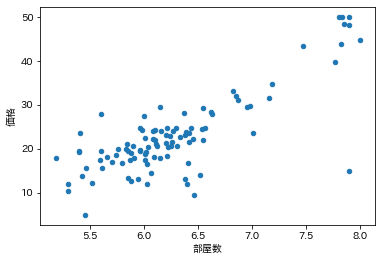

In [5]:
# ★② 上記の散布図で一番右下(部屋数が7.5よりも大きく、価格が20未満のもの)の外れ値を削除する。
# 該当データのインデックスを取得する
index_outliner = df_fillna[(df_fillna['部屋数'] > 7.5) & (df_fillna['価格'] < 20)].index

# 取得したインデックスを表示する
print(index_outliner)

# インデックス指定でデータを削除する
df_drop_outlier = df_fillna.drop(index_outliner, axis = 0)

Int64Index([11], dtype='int64')


▶実行結果  
Int64Index([11], dtype='int64')

In [12]:
# ★③ 外れ値を削除したデータフレームで、「価格」とその他の列の相関係数を表示する(「価格」同士の相関係数が含まれていてよい)
series_cor = df_drop_outlier.corr()["価格"]

print(series_cor)

犯罪率low     0.078166
犯罪率high   -0.299439
広さ         0.187409
産業        -0.385119
川辺         0.126303
窒素酸化物     -0.327234
部屋数        0.851384
古さ        -0.295796
主要施設       0.068697
高速道路      -0.242410
税金        -0.327084
生徒と先生     -0.406069
黒人         0.259165
低所得       -0.688096
価格         1.000000
Name: 価格, dtype: float64


▶実行結果  
犯罪率low     0.078166  
犯罪率high   -0.299439  
広さ         0.187409  
産業        -0.385119  
川辺         0.126303  
窒素酸化物     -0.327234  
部屋数        0.851384  
古さ        -0.295796  
主要施設       0.068697  
高速道路      -0.242410  
税金        -0.327084  
生徒と先生     -0.406069  
黒人         0.259165  
低所得       -0.688096  
価格         1.000000  
Name: 価格, dtype: float64

In [14]:
# ★④ 上記の相関係数の絶対値を降順に表示する
# 相関係数の絶対値を求め、abs_series_corに代入する
abs_series_cor = series_cor.map(abs)

# abs_series_corを降順に並び替えて表示する
abs_series_cor.sort_values(ascending = False)

価格         1.000000
部屋数        0.851384
低所得        0.688096
生徒と先生      0.406069
産業         0.385119
窒素酸化物      0.327234
税金         0.327084
犯罪率high    0.299439
古さ         0.295796
黒人         0.259165
高速道路       0.242410
広さ         0.187409
川辺         0.126303
犯罪率low     0.078166
主要施設       0.068697
Name: 価格, dtype: float64

▶実行結果  
価格         1.000000  
部屋数        0.851384  
低所得        0.688096  
生徒と先生      0.406069  
産業         0.385119  
窒素酸化物      0.327234  
税金         0.327084  
犯罪率high    0.299439  
古さ         0.295796  
黒人         0.259165  
高速道路       0.242410  
広さ         0.187409  
川辺         0.126303  
犯罪率low     0.078166  
主要施設       0.068697  
Name: 価格, dtype: float64

In [15]:
# 特徴量と正解データを以下の列とする
# 特徴量　…　「部屋数」「低所得」「生徒と先生」
# 正解データ　…　「価格」

# 特徴量をXに代入する
X = df_drop_outlier[['部屋数', '低所得', '生徒と先生']]

# 正解データをyに代入する
y = df_drop_outlier[['価格']]

In [17]:
# ★⑤ 「部屋数」の2乗を「部屋数2」という名前で特徴量のデータフレームに追加する
X['部屋数2'] = X['部屋数'] ** 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# 変数X, 変数yを「学習で用いるデータ」と「テストで用いるデータ」に分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
# ★⑥ 学習で用いるデータを標準化する
# StandardScalerのオブジェクトを生成し、変数sc_model_Xに代入する
sc_model_X = StandardScaler()

# 上記オブジェクトを使い、X_trainの情報を標準化し、変数X_train_scに代入する　
sc_model_X.fit(X_train)
X_train_sc = sc_model_X.transform(X_train)

# StandardScalerのオブジェクトを生成し、変数sc_model_yに代入する
sc_model_y = StandardScaler()

# 上記オブジェクトを使い、y_trainの情報を標準化し、変数y_train_scに代入する
sc_model_y.fit(y_train)
y_train_sc = sc_model_y.transform(y_train)

In [20]:
# ★⑦ 回帰を使って学習させる
# 回帰のオブジェクトを作成する
model = LinearRegression()

# 「学習で用いるデータ」を使って学習させる
model.fit(X_train_sc, y_train_sc)

LinearRegression()

In [22]:
# ★⑧	「テストで用いるデータ」を使用して、決定係数を表示する
# 「テストで用いるデータ」を標準化する
X_test_sc = sc_model_X.transform(X_test)

y_test_sc = sc_model_y.transform(y_test)

# 「テストで用いるデータ」の決定係数を計算し、表示する
print(model.score(X_test_sc, y_test_sc))

0.8784553121569637


▶実行結果  
0.8784553121569637

In [23]:
# ★⑨ 各カラムの係数、切片を確認する
# 特徴量(X_train)の列名を表示する
print(X_train.columns)

# 各カラムの係数を確認する
print(model.coef_)

# 切片を確認する
print(model.intercept_)

Index(['部屋数', '低所得', '生徒と先生', '部屋数2'], dtype='object')
[[-4.68082179 -0.34202197 -0.09532301  5.28130515]]
[-6.72077819e-15]


▶実行結果  
Index(['部屋数', '低所得', '生徒と先生', '部屋数2'], dtype='object')  
[[-4.68082179 -0.34202197 -0.09532301  5.28130515]]  
[-6.72077819e-15]

学習させた線形回帰を使い、下記のデータで予測する

|部屋数|低所得|生徒と先生|
| ----: | ----: | ----: |
|6|7.5|14.7|

In [24]:
# ★⑩ 上記の表のデータでの予測結果を求める
predict_rm = 6
predict_lstat = 7.5
predict_ptratio = 14.7
predict_data = pd.DataFrame([[predict_rm, predict_lstat, predict_ptratio, predict_rm ** 2]])


# X_trainの情報で予測データを標準化し、変数predict_data_scに代入する
predict_data_sc = sc_model_X.transform(predict_data)

# predict_data_scの内容で予測し、結果を変数predicted_price_scに代入する
predicted_price_sc = model.predict(predict_data_sc)

# predicted_price_scの標準化を元に戻し、結果を変数predicted_priceに代入する
predicted_price = sc_model_y.inverse_transform(predicted_price_sc)

# 結果を表示する
print(predicted_price)

[[24.61444532]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


▶実行結果  
[[24.61444532]]